In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
from datetime import datetime, timedelta
import sys

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
pd.set_option("display.max_rows", 100)

In [5]:
!du -sh ../data/public

1.3G	../data/public


In [6]:
subset = pd.read_csv("../data/public/public.csv", nrows=10000000)

In [7]:
subset.head()

,Work_DateTime,TIME_TYPE,WORK_NO,WORK_DESC,FUNC_CAT,TOT_BRK_TM,EmpNo_Anon,Incident_Number,incident
0,2014-05-12 07:00:00,Normal Time,ME007497,Scheduled Monthly Basic Meter ReadingMgt,Network or Asset,0.0,41091832.0,NaN,False
1,2014-05-12 08:00:00,Normal Time,ME007499,Scheduled Bi Monthly Basic MeterReadMgt,Network or Asset,0.0,41091832.0,NaN,False
2,2014-05-12 09:00:00,Normal Time,ME007499,Scheduled Bi Monthly Basic MeterReadMgt,Network or Asset,0.0,41091832.0,NaN,False
3,2014-05-12 10:00:00,Normal Time,ME007502,Annual Meter Reading Management,Network or Asset,0.0,41091832.0,NaN,False
4,2014-05-12 11:00:00,Normal Time,ME007502,Annual Meter Reading Management,Network or Asset,0.0,41091832.0,NaN,False


In [8]:
print(f"DataFrame Size: {(sys.getsizeof(subset)/(10**6)):.3f} MBs")

DataFrame Size: 4106.276 MBs


# UNIVARIATE

## Work_DateTime
The hour for this row

In [9]:
subset["Work_DateTime"] = pd.to_datetime(subset["Work_DateTime"], errors="coerce")

In [10]:
subset["Work_DateTime"].max()

Timestamp('2018-12-12 10:00:00')

In [11]:
subset["Work_DateTime"].min()

Timestamp('2014-05-12 07:00:00')

In [12]:
subset["Year"] = subset["Work_DateTime"].dt.year
subset["Month"] = subset["Work_DateTime"].dt.month
subset["Date"] = subset["Work_DateTime"].dt.date

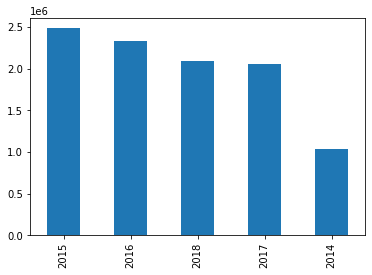

In [13]:
_ = subset["Year"].value_counts().plot(kind="bar")

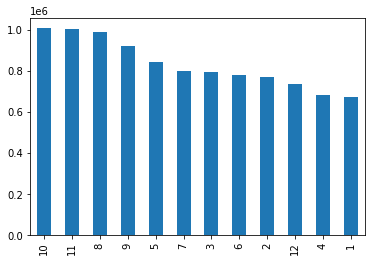

In [14]:
_ = subset["Month"].value_counts().plot(kind="bar")

## TIME_TYPE


In [15]:
subset["TIME_TYPE"].value_counts()

Normal Time    8851379
Overtime       1148621
Name: TIME_TYPE, dtype: int64

## WORK_NO

Code for work type

In [16]:
subset["WORK_NO"].value_counts()

NTRAI       318751
NADMN       204072
SSNOC004    114697
NMEET        99033
NSAFE        96522
             ...  
05271142         1
05675760         1
05135131         1
FL289679         1
05495556         1
Name: WORK_NO, Length: 490738, dtype: int64

Values don't make sense

## FUNC_CAT

Operational/Support/Network or Asset

In [17]:
subset["FUNC_CAT"].value_counts()

Operational         6259068
Network or Asset    2625285
Support             1115647
Name: FUNC_CAT, dtype: int64

Broader category of work type

## TOT_BRK_TM

Minutes of break time, averaged per hour in shift

In [18]:
subset["TOT_BRK_TM"].describe()

count    1.000000e+07
mean     2.394487e+00
std      3.095657e+00
min      0.000000e+00
25%      0.000000e+00
50%      2.727273e+00
75%      3.750000e+00
max      6.000000e+01
Name: TOT_BRK_TM, dtype: float64

In [19]:
subset.groupby("WORK_DESC")["TOT_BRK_TM"].sum().sort_values(ascending=False)

WORK_DESC
Training                                    977096.250003
TCS: Pole Distribution                      336553.954199
Admin                                       323177.531385
Safety                                      274202.916667
CONSTRUCTION                                249845.212121
                                                ...      
MP143659 SSX5 80A 37 WYATT RD, BAYSWATER         0.000000
MP143662 L22 LAW STREET MORLEY                   0.000000
MP143679 L137 122 HOLBECK ST DOUBLEVIEW          0.000000
MP143681 UMS: CANNING HWY, SOUTH PERTH C         0.000000
!*Crane rope u/s on drum WPC1380                 0.000000
Name: TOT_BRK_TM, Length: 176956, dtype: float64

In [20]:
subset.loc[subset["WORK_NO"]=="ME007705"].shape

(1287, 12)

In [21]:
subset.loc[subset["WORK_NO"]=="ME007705"].head(20)

,Work_DateTime,TIME_TYPE,WORK_NO,WORK_DESC,FUNC_CAT,TOT_BRK_TM,EmpNo_Anon,Incident_Number,incident,Year,Month,Date
5,2014-05-12 12:00:00,Normal Time,ME007705,Meter Reading Customer Support Basic,Network or Asset,15.0,41091832.0,NaN,False,2014,5,2014-05-12
12,2014-05-13 11:00:00,Normal Time,ME007705,Meter Reading Customer Support Basic,Network or Asset,15.0,41091832.0,NaN,False,2014,5,2014-05-13
13,2014-05-13 12:00:00,Normal Time,ME007705,Meter Reading Customer Support Basic,Network or Asset,15.0,41091832.0,NaN,False,2014,5,2014-05-13
20,2014-05-14 11:00:00,Normal Time,ME007705,Meter Reading Customer Support Basic,Network or Asset,15.0,41091832.0,NaN,False,2014,5,2014-05-14
21,2014-05-14 12:00:00,Normal Time,ME007705,Meter Reading Customer Support Basic,Network or Asset,15.0,41091832.0,NaN,False,2014,5,2014-05-14
28,2014-05-15 11:00:00,Normal Time,ME007705,Meter Reading Customer Support Basic,Network or Asset,15.0,41091832.0,NaN,False,2014,5,2014-05-15
29,2014-05-15 12:00:00,Normal Time,ME007705,Meter Reading Customer Support Basic,Network or Asset,15.0,41091832.0,NaN,False,2014,5,2014-05-15
37,2014-05-16 12:00:00,Normal Time,ME007705,Meter Reading Customer Support Basic,Network or Asset,15.0,41091832.0,NaN,False,2014,5,2014-05-16
4773,2014-07-28 11:00:00,Normal Time,ME007705,Meter Reading Customer Support Basic,Support,0.0,40921657.0,NaN,False,2014,7,2014-07-28
4862,2014-07-28 11:00:00,Normal Time,ME007705,Meter Reading Customer Support Basic,Support,0.0,40986607.0,NaN,False,2014,7,2014-07-28


> Rather than having the averaged break time, it would have been better if we would have had information about when in the day was the break taken. For example - If shift was for 8 hours & break was taken for 30 minutes, then I would have liked to have the info about when the break was taken - example 6 hours into the shift

Possible Features - 
1. Cumulative Sum of break time till the curent time
2. If break was taken in current hour

## WORK_DESC

In [22]:
subset["WORK_DESC"] = subset["WORK_DESC"].str.strip().str.upper()

In [23]:
subset["WORK_DESC"].nunique()

175786

In [24]:
subset["WORK_DESC"].value_counts()

TRAINING                                   319227
ADMIN                                      204167
TCS: POLE DISTRIBUTION                     145101
NC- DISTRIBUTION STANDARD JOBS             114617
TCS: CONDUCTOR                              99580
                                            ...  
DESIGN CONNECTION ASSETS NY014044               1
HELI EW SUSPCLAMP IMPROPINST 24546 P196         1
DESIGN CONNECTION ASSETS SY020720               1
DESIGN WORK ORDER 1 (OPEX) MP167953             1
DESIGN WORK ORDER 1 (OPEX) SP043304             1
Name: WORK_DESC, Length: 175786, dtype: int64

#### Splitting on `WORK ORDER`

Many of these `WORK_DESC` contains *WORK ORDER* at the end. But the main description is at the start of the sequence

In [25]:
subset.loc[subset["WORK_DESC"].str.contains("WORK ORDER")]["WORK_DESC"].str.split("WORK ORDER").str[0].value_counts()

DESIGN                            277019
VALIDATION                          4431
ADMIN                               2333
SCOPING                             2181
REVENUE ONLY                        2086
SCHEDULING                           553
ENTER                                517
REVENUE                              314
                                     261
REGION NORTH - EMERGENCY             194
NET OPS - CHARGEBLE                  148
CONTRACTS MANAGEMENT                 124
DESIGN MANAGEMENT                     59
QT:ELEC                               46
CLOSE OUT                             35
QT PROT EMERGENCY : TEMP              35
CB & RECLOSER SETTING CHANGES         29
CANCELLATION                          21
QT:68159 C/O FAULT                    15
QT:EL C/O RAISE CALL OUT              14
QT:68156 RAISE                        10
QT:47574 F/U                           9
QT:68160 FAULT                         9
QT:ELEC CREATE                         8
QT:ELEC C/O TX 3

Seeing it in full

In [26]:
subset["WORK_DESC"] = subset["WORK_DESC"].apply(lambda x: x.split("WORK ORDER")[0])

In [27]:
subset["WORK_DESC"].nunique(), subset["WORK_DESC"].isna().sum()

(137214, 0)

In [28]:
subset["WORK_DESC"].value_counts().sample(n=100)

SP043170 MOORE ROAD DARDANUP S2               41
NP027991 NEWCASTLE RD, NORTHAM                64
MP162088 BENARA RD BEECHBORO                 324
SERVICE PROVIDER MP159899                      4
BCH/Z016:REPAIR FAULT INDICATOR               14
DESIGN CONNECTION ASSETS NY015254              1
TCS: SB101/74 - DAADENNING CREEK              36
DESIGN CONNECTION ASSETS SY017463              2
6306, 55, WHITE ST, BROOKTON                   4
SUBSTATION PLANT PROCUREMENT - T0408944       69
WPC429 MAJOR REPAIRS/INTRIM SERVICE           71
QT:EL CC515 SENSITIVE EARTH FAULT ALARM       32
REPLACE INVERTER IN CAB                        8
PAR:REPLACE POLE 49192 P167                   28
MUC/Z007:SNIPER:REPLACE WOOD POLE PWOD/P      41
MQ037267 56 MOULDEN AVE YOKINE 6060            5
MP161529 7 KALAMUNDA RD KALAMUNDA, DRD -      18
A1 VEHICLE/PLANT SERVICE WPC 2124              1
CLEARANCE ASSESSMENT                         185
GTN/Z224:RPRF:PALLIATIVE REINFORCE POLE        6
BEL/Z011:INSTALL ID 

REPAIR EARTH PWOD/PINT

In [39]:
subset.loc[subset["WORK_DESC"].str.contains("NETWORK PLANNING")]["WORK_DESC"].value_counts()

NETWORK PLANNING    45663
Name: WORK_DESC, dtype: int64

### Categorise *WORK_DESC*
Utility Function to replace `WORK_DESC` based on text similarity

In [30]:
def categorise_work_desc(data, pat):
    temp = data.loc[data["WORK_DESC"].str.contains(pat)]
    print(f"Pattern Matched: {temp.shape}")
    print(f"Before: {data['WORK_DESC'].nunique()}")
    data.loc[temp.index, "WORK_DESC"] = pat
    print(f"After: {data['WORK_DESC'].nunique()}")
    return data

1. DESIGN CONNECTION ASSETS

In [31]:
subset = categorise_work_desc(subset, "DESIGN CONNECTION ASSETS")

Pattern Matched: (84581, 12)
Before: 137214
After: 125707


2. NETWORK PLANNING

In [32]:
subset = categorise_work_desc(subset, "NETWORK PLANNING")

Pattern Matched: (45663, 12)
Before: 125707
After: 124344


3. DESIGN INTERNAL

In [33]:
subset = categorise_work_desc(subset, "DESIGN INTERNAL")

Pattern Matched: (30834, 12)
Before: 124344
After: 122380


4. REPLACE TYRES

In [34]:
print(f"BEFORE: {subset['WORK_DESC'].nunique()}")
subset.loc[subset["WORK_DESC"].str.contains(pat=r"(?=.*REPLACE)(?=.*TYRES)", regex=True), "WORK_DESC"] = "REPLACE TYRES"
print(f"AFTER: {subset['WORK_DESC'].nunique()}")

BEFORE: 122380
AFTER: 122172


5. REPLACE WOOD POLE PWOD/PINT

In [35]:
subset = categorise_work_desc(subset, "REPLACE WOOD POLE PWOD/PINT")

Pattern Matched: (163066, 12)
Before: 122172
After: 121556


6. DESIGN SYSTEM ASSETS

In [36]:
subset = categorise_work_desc(subset, "DESIGN SYSTEM ASSETS")

Pattern Matched: (1071, 12)
Before: 121556
After: 121326


7. REPAIR EARTH PWOD/PINT

In [38]:
subset = categorise_work_desc(subset, "REPAIR EARTH PWOD/PINT")

Pattern Matched: (1476, 12)
Before: 121326
After: 121230


#### Relationship with `WORK_NO`

In [39]:
subset.groupby("WORK_NO")["WORK_DESC"].value_counts()

WORK_NO   WORK_DESC                               
00332105  DATA MAINTENENCE                            55568
          VALIDATING...                                  18
00350424  NP DX POLICY,STRATEGY DEVELOPT & IMPLENT    28275
          VALIDATING...                                   9
00350425  NP DX PROCEDURES & STDS DEVELOPMENT          1013
                                                      ...  
Y0294800  WAR/Z45:BFM:REPLACE WOOD POLE PWOD/PTOF         4
Y0294802  VP/Z002:PAR:REPLACE LV TIES PWOD/PINT           2
Y0294844  K/Z012:BFM:REPLACE HV TIES PWOD/PINT            2
Y0294852  BSN/Z35:REPLACE OVERHEAD SERVICE CUSA/CU        2
`         QT:13418 415V STANDBY SUPPLY FAIL ALARM         1
Name: WORK_DESC, Length: 495971, dtype: int64

There isn't one-to-one mapping between `WORKNO` & `WORK_DESC`. Categorisation of `WORK_DESC` is needed. Post that `WORK_NO` can be ignored

## EmpNo_Anon

Anonomised Employee identifier

In [40]:
subset["EmpNo_Anon"].value_counts()

38478632.0    12698
40859157.0    12042
38513682.0    11911
41032807.0    11631
40922307.0    11622
              ...  
41097957.0        5
38482332.0        5
40926557.0        3
40859957.0        3
41002457.0        2
Name: EmpNo_Anon, Length: 1948, dtype: int64

In [41]:
subset.groupby("EmpNo_Anon")["Date"].unique()

EmpNo_Anon
38321907.0    [2014-07-28, 2014-07-29, 2014-07-30, 2014-07-3...
38323232.0    [2014-07-28, 2014-07-29, 2014-07-30, 2014-07-3...
38325082.0    [2014-07-27, 2014-07-28, 2014-07-29, 2014-07-3...
38325507.0    [2014-07-28, 2014-07-29, 2014-07-30, 2014-07-3...
38325582.0    [2014-08-18, 2014-08-19, 2014-08-20, 2014-08-2...
                                    ...                        
41206882.0    [2018-10-29, 2018-10-30, 2018-10-31, 2018-11-0...
41206957.0    [2018-10-29, 2018-10-30, 2018-10-31, 2018-11-0...
41207382.0    [2018-11-05, 2018-11-06, 2018-11-07, 2018-11-0...
41207482.0    [2018-11-05, 2018-11-06, 2018-11-07, 2018-11-0...
41207682.0    [2018-11-13, 2018-11-14, 2018-11-15, 2018-11-1...
Name: Date, Length: 1948, dtype: object

## Incident_Number

In [42]:
subset["Incident_Number"].value_counts()

INC1033637    2
INC1035464    2
INC1013943    2
INC1032439    1
INC1012958    1
             ..
INC1016248    1
INC1014360    1
INC1024525    1
INC1026214    1
INC1031417    1
Name: Incident_Number, Length: 417, dtype: int64

## incident

In [43]:
subset["incident"].value_counts()

False    9999580
True         420
Name: incident, dtype: int64

## Feature Engineering

### PERIOD
1. Late Night - 12AM to 4AM
2. Early Morning - 4AM to 8AM
3. Morning - 8AM to 12PM
4. Noon - 12PM to 4PM
5. Evening - 4PM to 8PM
6. Night - 8PM to 12AM

In [44]:
bins = [0, 4, 8, 12, 16, 20, 24]
labels = ["Late Night", "Early Morning", "Morning", "Noon", "Evening", "Night"]

In [45]:
subset["period"] = pd.cut(subset["Work_DateTime"].dt.hour, bins=bins, labels=labels, include_lowest=True)

In [46]:
subset["period"].value_counts()

Morning          4155229
Noon             3316971
Early Morning    1988156
Evening           352231
Night              99338
Late Night         88075
Name: period, dtype: int64

### SEASON
[Perth Weather](https://www.australia.com/en-in/facts-and-planning/weather-in-australia/perth-weather.html)

1. Summer (December – February)
2. Autumn (March – May)
3. Winter (June – August)
4. Spring (September – November)

In [47]:
subset.loc[subset["Month"].isin([12, 1, 2]), "season"] = "Summer"
subset.loc[subset["Month"].isin([3, 4, 5]), "season"] = "Autumn"
subset.loc[subset["Month"].isin([6, 7, 8]), "season"] = "Winter"
subset.loc[subset["Month"].isin([9, 10, 11]), "season"] = "Spring"

In [49]:
subset["season"].value_counts()

Spring    2934468
Winter    2568116
Autumn    2321526
Summer    2175890
Name: season, dtype: int64

### DAYLIGHT SAVING

No. Daylight savings is not observed in Western Australia. The time zone in Western Australia is Australian Western Standard Time (AWST), UTC +8.

### DAY OF THE WEEK

In [50]:
subset["day_of_week"] = pd.to_datetime(subset["Work_DateTime"]).dt.dayofweek

### SHIFT HOUR
Which hour in the shift are we talking about?

In [124]:
temp = subset.iloc[60:120]

In [125]:
def get_shift_hour(group):
    group["shift_hour"] = group["Work_DateTime"] - group.iloc[0]["Work_DateTime"]
    return group

In [126]:
def get_date_group(group):
    return group.groupby("Date").apply(get_shift_hour)

In [127]:
temp = temp.groupby("EmpNo_Anon").apply(get_date_group)[["Work_DateTime", "EmpNo_Anon", "Date", "shift_hour"]]

In [129]:
temp["shift_hour"] = temp["shift_hour"].dt.seconds//3600

In [130]:
temp.head(20)

,Work_DateTime,EmpNo_Anon,Date,shift_hour
60,2014-06-18 14:00:00,40912482.0,2014-06-18,0
61,2014-06-18 15:00:00,40912482.0,2014-06-18,1
62,2014-06-18 15:00:00,41062207.0,2014-06-18,0
63,2014-06-19 09:00:00,40912482.0,2014-06-19,0
64,2014-06-19 10:00:00,40912482.0,2014-06-19,1
65,2014-06-19 11:00:00,40912482.0,2014-06-19,2
66,2014-06-19 12:00:00,40912482.0,2014-06-19,3
67,2014-06-19 13:00:00,40912482.0,2014-06-19,4
68,2014-06-19 14:00:00,40912482.0,2014-06-19,5
69,2014-06-20 09:00:00,40912482.0,2014-06-20,0


Groupby operations are taking too long

### GAP BETWEEN WORKING DAYS

In [131]:
subset["gap"] = subset.groupby("EmpNo_Anon")["Date"].diff()

In [132]:
# 1 is to offset change in consecutive days
# subset["Gap"] = subset["Gap"] - timedelta(days=1)

In [133]:
subset.loc[subset["EmpNo_Anon"]==41062207.0]

,Work_DateTime,TIME_TYPE,WORK_NO,WORK_DESC,FUNC_CAT,TOT_BRK_TM,EmpNo_Anon,Incident_Number,incident,Year,Month,Date,period,season,day_of_week,gap
53,2014-06-17 15:00:00,Overtime,4283069,VALIDATING...,Operational,0.0,41062207.0,NaN,False,2014,6,2014-06-17,Noon,Winter,1,NaT
54,2014-06-17 16:00:00,Overtime,4283069,VALIDATING...,Operational,0.0,41062207.0,NaN,False,2014,6,2014-06-17,Noon,Winter,1,0 days
62,2014-06-18 15:00:00,Overtime,4283069,Q1:BYF/Z002:ZR03:REPLACE INTER POLE,Operational,0.0,41062207.0,NaN,False,2014,6,2014-06-18,Noon,Winter,2,1 days
77,2014-06-24 15:00:00,Overtime,4594215,WCE BRIDGETOWN 242886 LABOUR 13/14,Operational,0.0,41062207.0,NaN,False,2014,6,2014-06-24,Noon,Winter,1,6 days
78,2014-06-24 16:00:00,Overtime,4594215,WCE BRIDGETOWN 242886 LABOUR 13/14,Operational,0.0,41062207.0,NaN,False,2014,6,2014-06-24,Noon,Winter,1,0 days
79,2014-06-26 15:00:00,Overtime,4594215,WCE BRIDGETOWN 242886 LABOUR 13/14,Operational,0.0,41062207.0,NaN,False,2014,6,2014-06-26,Noon,Winter,3,2 days
80,2014-06-26 16:00:00,Overtime,4594215,WCE BRIDGETOWN 242886 LABOUR 13/14,Operational,0.0,41062207.0,NaN,False,2014,6,2014-06-26,Noon,Winter,3,0 days
2031624,2015-05-28 15:00:00,Overtime,4852915,MUC/Z001:REPLACE LV CROSS ARM,Operational,0.0,41062207.0,NaN,False,2015,5,2015-05-28,Noon,Autumn,3,336 days
2032149,2015-05-28 16:00:00,Overtime,4852915,MUC/Z001:REPLACE LV CROSS ARM,Operational,0.0,41062207.0,NaN,False,2015,5,2015-05-28,Noon,Autumn,3,0 days
2040989,2015-05-29 15:00:00,Overtime,4852915,MUC/Z001:REPLACE LV CROSS ARM,Operational,0.0,41062207.0,NaN,False,2015,5,2015-05-29,Noon,Autumn,4,1 days


### CONSECUTIVE WORKING HOURS

### CONSECUTIVE WORKING DAYS

### BREAK IN A WORKING DAY

The objective is to try to figure out when the break was taken

In [ ]:
temp = subset.loc[subset["TOT_BRK_TM"]>0]

In [ ]:
temp.shape, temp.shape[0]/subset.shape[0]

Let's analyse a couple of TOT_BRK_TM on a particular day

In [ ]:
temp.sample(n=10)

In [ ]:
temp.loc[temp["Date"]==pd.to_datetime("2017-09-01")]["EmpNo_Anon"].value_counts().head()

In [ ]:
temp.loc[(temp["Date"]==pd.to_datetime("2017-09-01")) & (temp["EmpNo_Anon"]==41099707.0)]

In [ ]:
2.727273*11

How is it possible that someone's working for 11 hours with just half an hour break??

### COUNT OF SAME TASK COUNT IN A DAY

Finding out for how many hours in a day has an employee worked on the same task so far

In [ ]:
def count_num_hours_per_work(group):
    group["hours_per_task"] = group["WORK_DESC"].duplicated().cumsum()
    return group

In [ ]:
subset.head(200).groupby(["EmpNo_Anon", "Date", "WORK_NO"]).apply(count_num_hours_per_work).head(20)

**Takes too long to run**. Need to check feasibility